# Oussama RCHAKI

# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [18]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

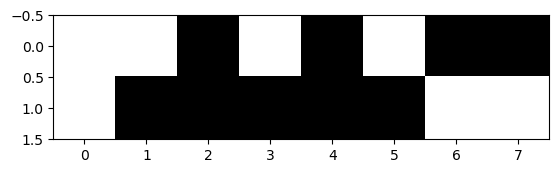

In [19]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1

$U(x)=\sum\limits_{c\in\mathcal{C}}V_c(x)=11\beta$


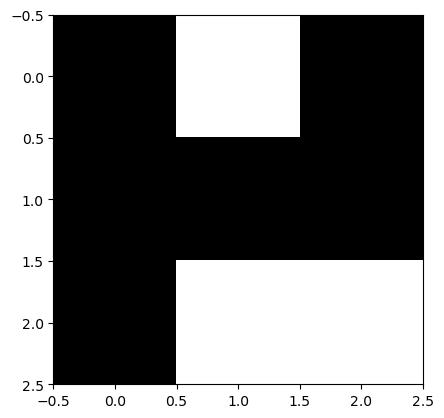

In [20]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2

The conditional probability at a pixel \( s \) is given by:

$$
P(X_s = x_s \mid V_s) = \frac{1}{Z^s} \exp(-U_s(x_s, V_s))
$$

where $ Z^s $ is the normalization constant:

$$
Z^s = \sum_{\xi \in E} \exp(-U_s(\xi, V_s)).
$$

#### Local Conditional Energies:
For the given neighborhood configuration $ V_s $, the local conditional energies are:

$$
U_s(x_s = 0, V_s) = 3\beta
$$

$$
U_s(x_s = 1, V_s) = 5\beta
$$

#### Local Conditional Probabilities:
Using the energies above, we compute the conditional probabilities as follows:

$$
\boxed{P(X_s = 0 \mid V_s) = \frac{\exp(-3\beta)}{\exp(-3\beta) + \exp(-5\beta)}}
$$

$$
\boxed{P(X_s = 1 \mid V_s) = \frac{\exp(-5\beta)}{\exp(-3\beta) + \exp(-5\beta)}}
$$

#### Most Probable Class:
Since ( P($X_s$ = 0 $\mid$ $V_s$) > P($X_s$ = 1 $\mid$ $V_s$) ) (for $\beta$ > 0 ), the most probable class is the one of 0.



## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



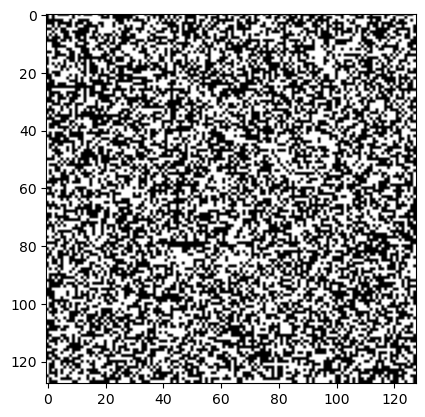

In [21]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [61]:
import math
import random

def echan(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            # Indices for neighboring pixels
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (im_bin[i, j1] + im_bin[i, j2] + im_bin[i1, j] + im_bin[i2, j]) * beta_reg
            p0 = math.exp(-Ureg0)

            

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = ((1-im_bin[i, j1]) + (1-im_bin[i, j2]) + (1-im_bin[i1, j]) + (1-im_bin[i2, j])) * beta_reg
            p1 = math.exp(-Ureg1)

            #I dont divize by Z because it is only a constant and will not influence in the comparaison between p1 and p0 after

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin



By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

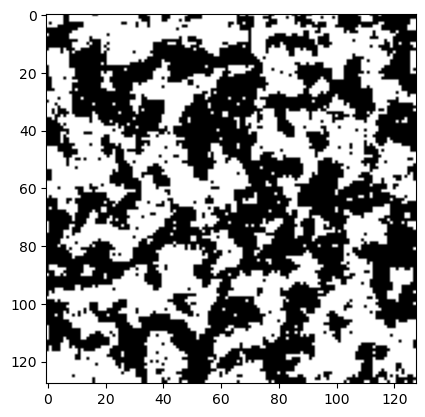

In [37]:

# random initialization of im_bin
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))


beta_reg=1
"""
mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()
"""

for n in range(10):
    echan(im_bin,beta_reg)
    """
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)
    """


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

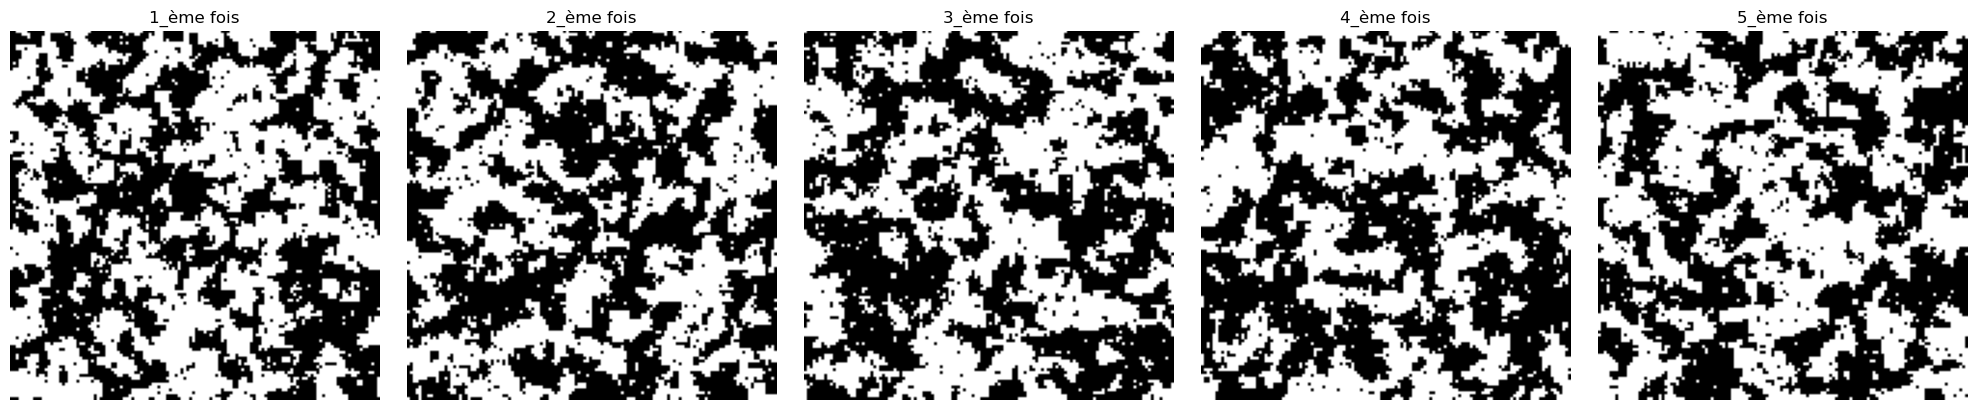

In [39]:
# random initialization of im_bin
sh = [128, 128]

fig, axs = plt.subplots(1, 5, figsize=(20, 4))  # Create a horizontal layout with 5 subplots

for i in range(5):
    im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

    beta_reg = 1

    for n in range(10):
        echan(im_bin, beta_reg)

    axs[i].imshow(im_bin)
    axs[i].set_title(f"{i + 1}_ème fois")
    axs[i].axis('off')  # Turn off axis for better visualization

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#A3
When runing the program multiple times, I dont get the same image each time. This is because:

1. **Random Initialization**: The binary image `im_bin` is initialized with random values using `np.random.rand`. Since the random seed is not fixed, the initial configuration of the image changes every time the program is run.

2. **Stochastic Process**: The `echan` function uses probabilities and random sampling (`random.uniform`) to determine the state of each pixel, which further introduces randomness to the output.

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

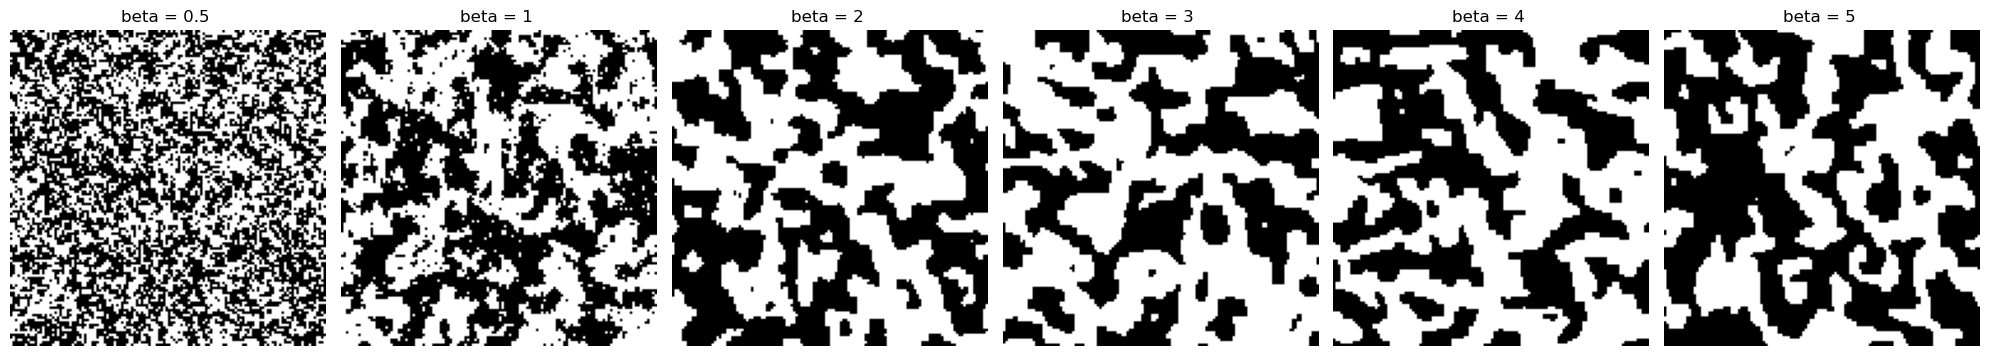

In [46]:
# random initialization of im_bin
sh = [128, 128]

fig, axs = plt.subplots(1, 6, figsize=(20, 4))  # Create a horizontal layout with 5 subplots
beta=[0.5, 1, 2, 3, 4, 5]
for idx, i in enumerate(beta):  # Use enumerate to get an integer index
    im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

    beta_reg = i

    for n in range(10):
        echan(im_bin, beta_reg)

    axs[idx].imshow(im_bin)
    axs[idx].set_title(f"beta = {i} ")
    axs[idx].axis('off')  # Turn off axis for better visualization

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#A4
As 𝛽 increases from 0.5 to 20, the images transition from disordered to highly ordered. At low values of 𝛽 (e.g., 0.5), randomness dominates, resulting in noisy images. As 𝛽 increases the influence of neighboring pixels becomes more apparent, as the regularization effect takes over, leading to large homogeneous regions of similar pixel values, creating a highly ordered and smooth appearance. This progression demonstrates the increasing dominance of the attractive potential in the Ising model as 𝛽 grows.

#Q5
Which image minimizes the overall energy for this model?

#A5
The overall energy is proportional to the number of cliques (in our case, cliques of order 2) with a non-zero potential, meaning cliques consisting of two different pixels, 1 and 0. Therefore, the image that minimizes the overall energy is one where neighboring pixels are as similar as possible, forming large homogeneous regions with minimal transitions between 0 and 1.

#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

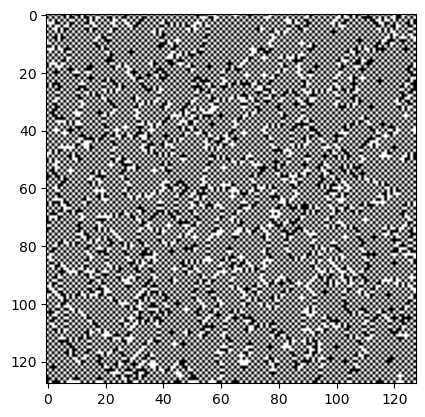

In [47]:
# random initialization of im_bin
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))


beta_reg=-1


for n in range(10):
    echan(im_bin,beta_reg)



plt.figure()
plt.imshow(im_bin)
plt.show()

#A6 When 𝛽 is negative, the result shows a highly disordered image with neighboring pixels favoring different states (0 and 1). This behavior is the opposite of the typical attractive potential seen with positive 𝛽. 

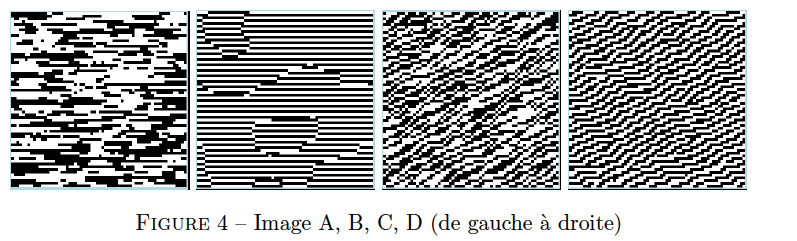

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





#A7
* **Image A**: Cliques on horizontal $(V_c(0,0), V_c(1,1))$ direction have a potential of (-1).  
* **Image B**: In addition to the previous one, cliques on vertical $(V_c(0,0), V_c(1,1))$ direction have a potential of (+1).  
* **Image C**: In addition to the 2 previous ones, cliques on diagonal at $\pi / 4$ $(V_c(0,0), V_c(1,1))$ direction have a potential of (-1).  
* **Image D**: In addition to the 3 previous ones, cliques on diagonal at $3\pi / 4$ $(V_c(0,0), V_c(1,1))$ direction have a potential of (+1).  


## IMAGE A

In [77]:
def echanA(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (
                (-1 if im_bin[i,j1]==0 else 0) + (-1 if im_bin[i,j2]==0 else 0)
            ) * beta_reg
            p0 = math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = (
                (-1 if im_bin[i,j1]==1 else 0) + (-1 if im_bin[i,j2]==1 else 0))* beta_reg
            p1 = math.exp(-Ureg1)

            #I dont divize by Z because it is only a constant and will not influence in the comparaison between p1 and p0 after

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin

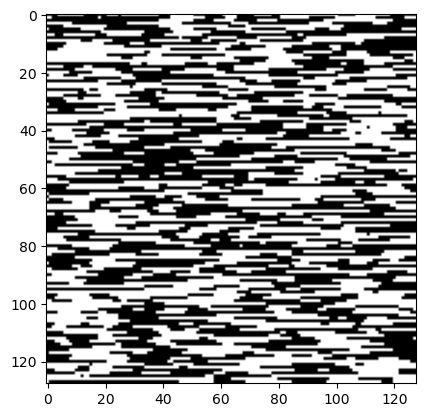

In [82]:
# random initialization of im_bin
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))


beta_reg=50


for n in range(10):
    echanA(im_bin,beta_reg)



plt.figure()
plt.imshow(im_bin)
plt.show()

## IMAGE B

In [79]:
def echanB(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (
                (-1 if im_bin[i,j1]==0 else 0) + (-1 if im_bin[i,j2]==0 else 0) + (1 if im_bin[i1,j]==0 else 0) + (1 if im_bin[i2,j]==0 else 0)
            ) * beta_reg
            p0 = math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = (
                (-1 if im_bin[i,j1]==1 else 0) + (-1 if im_bin[i,j2]==1 else 0)+ (1 if im_bin[i1,j]==1 else 0) + (1 if im_bin[i2,j]==1 else 0))* beta_reg
            p1 = math.exp(-Ureg1)

            #I dont divize by Z because it is only a constant and will not influence in the comparaison between p1 and p0 after

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin

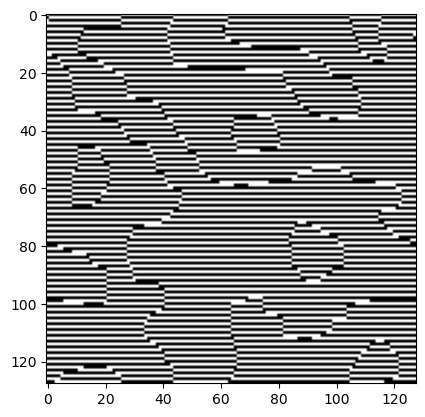

In [81]:
# random initialization of im_bin
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))


beta_reg=10


for n in range(50):
    echanB(im_bin,beta_reg)



plt.figure()
plt.imshow(im_bin)
plt.show()

## IMAGE C

In [85]:
def echanC(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (
                (-1 if im_bin[i,j1]==0 else 0) + (-1 if im_bin[i,j2]==0 else 0) + (1 if im_bin[i1,j]==0 else 0) + (1 if im_bin[i2,j]==0 else 0) + (-1 if im_bin[i1,j2]==0 else 0) + (-1 if im_bin[i2,j1]==0 else 0)
            ) * beta_reg
            p0 = math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = (
                (-1 if im_bin[i,j1]==1 else 0) + (-1 if im_bin[i,j2]==1 else 0)+ (1 if im_bin[i1,j]==1 else 0) + (1 if im_bin[i2,j]==1 else 0) + (-1 if im_bin[i2,j1]==1 else 0) + (-1 if im_bin[i1,j2]==1 else 0))* beta_reg
            p1 = math.exp(-Ureg1)

            #I dont divize by Z because it is only a constant and will not influence in the comparaison between p1 and p0 after

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin

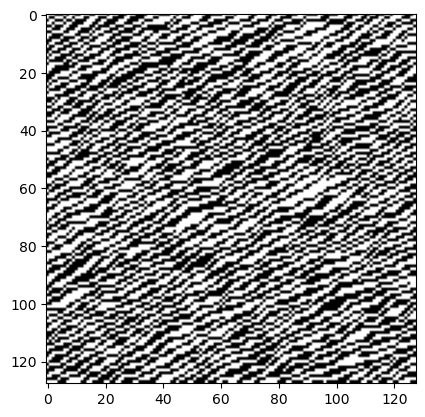

In [86]:
# random initialization of im_bin
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))


beta_reg=10


for n in range(50):
    echanC(im_bin,beta_reg)



plt.figure()
plt.imshow(im_bin)
plt.show()

## IMAGE D

In [88]:
def echanD(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (
                (-1 if im_bin[i,j1]==0 else 0) + (-1 if im_bin[i,j2]==0 else 0) + (1 if im_bin[i1,j]==0 else 0) + (1 if im_bin[i2,j]==0 else 0) + (-1 if im_bin[i1,j2]==0 else 0) + (-1 if im_bin[i2,j1]==0 else 0)+ (1 if im_bin[i1,j1]==0 else 0) + (1 if im_bin[i2,j2]==0 else 0) 
            ) * beta_reg
            p0 = math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = (
                (-1 if im_bin[i,j1]==1 else 0) + (-1 if im_bin[i,j2]==1 else 0)+ (1 if im_bin[i1,j]==1 else 0) + (1 if im_bin[i2,j]==1 else 0) + (-1 if im_bin[i2,j1]==1 else 0) + (-1 if im_bin[i1,j2]==1 else 0) + (1 if im_bin[i1,j1]==1 else 0) + (1 if im_bin[i2,j2]==1 else 0) 
            )* beta_reg
            p1 = math.exp(-Ureg1)

            #I dont divize by Z because it is only a constant and will not influence in the comparaison between p1 and p0 after

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin

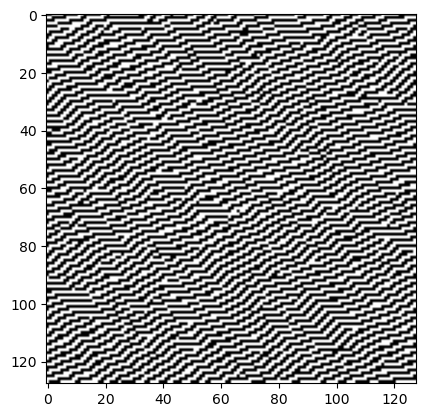

In [89]:
# random initialization of im_bin
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))


beta_reg=10


for n in range(50):
    echanD(im_bin,beta_reg)



plt.figure()
plt.imshow(im_bin)
plt.show()

This confirm my theorical values

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

In [94]:
def echanDiagonal(im_bin, beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1 = (i - 1) % im_bin.shape[0]
            i2 = (i + 1) % im_bin.shape[0]
            j1 = (j - 1) % im_bin.shape[1]
            j2 = (j + 1) % im_bin.shape[1]

            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = (
                 (-1 if im_bin[i1,j2]==0 else 0) + (-1 if im_bin[i2,j1]==0 else 0)+ (-1 if im_bin[i1,j1]==0 else 0) + (-1 if im_bin[i2,j2]==0 else 0) 
            ) * beta_reg
            p0 = math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = (
                  (-1 if im_bin[i2,j1]==1 else 0) + (-1 if im_bin[i1,j2]==1 else 0) + (-1 if im_bin[i1,j1]==1 else 0) + (-1 if im_bin[i2,j2]==1 else 0) 
            )* beta_reg
            p1 = math.exp(-Ureg1)

            #I dont divize by Z because it is only a constant and will not influence in the comparaison between p1 and p0 after

            # sampling according to the normalized probabilities
            if p0 + p1 != 0.0:
                if random.uniform(0, 1) < p0 / (p0 + p1):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin

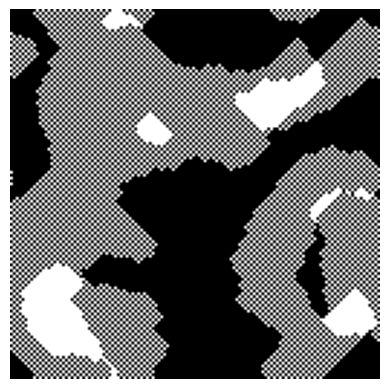

In [95]:
# random initialization of im_bin
sh = [128, 128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

beta_reg = 10

for n in range(50):
    echanDiagonal(im_bin, beta_reg)

plt.figure()
plt.imshow(im_bin)
plt.set_cmap("gray")
plt.axis("off")
plt.show()

By implementing the Ising model with diagonal attractive potential in both directions (
π/4 and 
3π/4), the resulting image shows a strong tendency for neighboring pixels along the diagonals to have similar values (either 0 or 1). This creates diagonal patterns or clusters of uniform regions aligned with these directions, reflecting the model's bias towards diagonal smoothness. Horizontal and vertical alignments remain less structured since their potentials are set to zero.